# Overview and references 

You will download some sequences, import them into this notebook, analyze them, 
and plot the results. You should be able to complete this task using the lab slides as a reference, 
along with the resources listed below.

Please be sure to follow the standard submission workflow (checklist at end of notebook).


## References

Matplotlib 

1. https://matplotlib.org/users/pyplot_tutorial.html 
2. https://matplotlib.org/examples/statistics/boxplot_demo.html
3. https://matplotlib.org/examples/statistics/histogram_demo_features.html

BioPython

1. https://biopython.org/wiki/SeqIO 
2. https://biopython.org/wiki/Phylo 
3. https://biopython.org/DIST/docs/api/Bio.Align.MultipleSeqAlignment-class.html


# Package installation

First, let's install the packages we need for the lab. Recall, the `!` before a command runs the command in the terminal.

In [1]:
!conda config --add channels bioconda
!conda install -y biopython muscle fasttree 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - biopython
    - fasttree
    - muscle


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    biopython-1.79             |   py39hb9d737c_2         2.6 MB  conda-forge
    ca-certificates-2022.9.24  |       ha878542_0         150 KB  conda-forge
    certifi-2022.9.24          |     pyhd8ed1ab_0         155 KB  conda-forge
    fasttree-2.1.11            |       hec16e2b_1         252 KB  bioconda
    muscle-5.1                 |       h9f5acd7_1         301 KB  bioconda
    openssl-1.1.1q             |       h166bdaf_1         2.1 MB  conda-forge
    ------------------------------------------------------------
    

# Background

Your PI has given you a set of DNA sequences and told you they are related. It’s not clear 
whether they are from the same taxon (paralogs), different taxa (orthologs), or perhaps a 
combination of the two. Perhaps they have some, but not all, domains in common (partial 
homology). What are some ways we can analyze them and figure out what their relationship is? 
What are some properties of DNA sequences, and how can we compare them to each other? 

In this lab, we will use the file `seqs.fa` that is contained in your cloned repository.

# 1. Generating a phylogenetic tree

Sequence alignment is the bread-and-butter of comparative genomics. When two sequences 
are aligned, we assume that each column corresponds to the same position in some ancestral 
sequence. Any indels or point mutations that occurred over evolutionary time then become 
apparent. Columns where the sequence has not changed show us which positions are 
conserved. Columns with differences show us where and how sequences have evolved since 
the most recent common ancestor.

We will cover this in greater detail later in the semester, but for now, it’s safe to consider a 
sequence aligner as a “black box.” In its simplest form, two unaligned sequences go in, and two 
aligned sequences come out. All the aligner really does is insert gaps (dashes, “-“) such that 
some arbitrary scoring function is maximized. Consider the following example:

```
Seq1 ATGATTAAG 
     ||     | 
Seq2 ATTGGCTAAG 
```

The sequences, with no gaps and beginning at the first column, match at only three positions. 
By eye, it looks like those two TAAG blocks at the end ought to match up, right? Recall that 
we’re trying to infer which parts of the sequence were present in the common ancestor of both 
Seq1 and Seq2, so we can infer which parts of the sequence have changed.

```
Seq1 AT-GATTAAG 
     || |  |||| 
Seq2 ATTGGCTAAG
```

By inserting a gap in Seq1, we now have seven matching positions. We can now infer that there 
was an indel in column 3 (i.e., a T was either inserted in Seq2 or deleted from Seq1—note that 
we can’t distinguish between these two possibilities without more data). It also looks like there 
may have been two transitions (i.e., A<-->G or C<-->T) in columns 5 and 6—note that we don’t 
know the directionality of these changes, again, without more data. 


What if we have many sequences, rather than just two? Can we align those to each other? Yes, 
of course! The result is called a multiple sequence alignment (MSA). When presented with a 
bunch of related sequences to analyze, generating an MSA is a great place to start. 


There’s a fantastic tool available to perform this very task: MUSCLE. Written by Bob Edgar, it 
has been cited over 22,000 times. If you’re ever wondering how to get your citation count up, 
writing some simple tool that everyone will use is definitely the way to go.

Now let's run muscle.

In [2]:
!muscle -super5 seqs.fa -output seqs.aligned.fa


muscle 5.1.linux64 []  53.5Gb RAM, 8 cores
Built Feb 24 2022 03:16:15
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 48 seqs, length avg 2210 max 2217

00:00 8.5Mb   100.0% Derep 47 uniques, 0 dupes
00:00 10Mb   CPU has 8 cores, running 8 threads                    
00:48 40Mb    100.0% UCLUST 48 seqs EE<0.01, 3 centroids, 44 members
00:50 568Mb   100.0% UCLUST 3 seqs EE<0.30, 1 centroids, 1 members  
00:51 568Mb   100.0% Make cluster MFAs                            
1 clusters pass 1                     
1 clusters pass 2
00:51 568Mb  
00:51 568Mb  Align cluster 1 / 1 (3 seqs)
00:51 568Mb  
00:51 961Mb   100.0% Calc posteriors
00:52 568Mb   100.0% Consistency (1/2)
00:52 568Mb   100.0% Consistency (2/2)
00:52 568Mb   100.0% UPGMA5           
00:54 583Mb   100.0% Refining
00:54 583Mb   100.0% Consensus sequences


## 1.1

Examine the contents of the input and output of this command. What do 
you notice?

## 1.1 Answer

*The input is the 48 sequences. The output has 48 sequences with gaps inserted between them. These gaps maximize the alignment scores between all the sequences together.*

We will go into more detail on generating trees later in the semester, but for now, you can use 
Morgan Price’s excellent tool FastTree to take your multiple alignment and turn it into a 
Newick-formatted tree. 

In [3]:
!fasttree -nt < seqs.aligned.fa > tree.nwk

FastTree Version 2.1.11 Double precision (No SSE3)
Alignment: standard input
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
Initial topology in 0.05 seconds
Refining topology: 22 rounds ME-NNIs, 2 rounds ME-SPRs, 11 rounds ML-NNIs
Total branch-length 0.966 after 0.61 sec2, 1 of 46 splits   
ML-NNI round 1: LogLk = -15694.781 NNIs 8 max delta 7.33 Time 0.93
Switched to using 20 rate categories (CAT approximation)1 of 20   
Rate categories were divided by 0.745 so that average rate = 1.0
CAT-based log-likelihoods may not be comparable across runs
Use -gamma for approximate but comparable Gamma(20) log-likelihoods
ML-NNI round 2: LogLk = -14307.773 NNIs 0 max delta 0.00 Time 1.08
Turning off heuristics for final round of ML NNIs (converged)
ML-NNI round 3: LogLk = -14307.517 NNIs 0 max del

## 1.2

Visualize your tree using Bio.Phylo. You will notice that there is some clustered structure in the tree.

In [9]:
# Imports
from Bio import Phylo # Imports Bio.Phylo
from io import StringIO # Imports StringIO for reading strings
from matplotlib import pyplot as plt

# plotting code here
tree = Phylo.read("tree.nwk", "newick")
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=5e-09, confidence=0.284)
            Clade(branch_length=0.004075671, name='hu.39')
            Clade(branch_length=0.001806696, name='rh.52')
        Clade(branch_length=0.001355567, name='rh.53')
        Clade(branch_length=6e-09, confidence=0.879)
            Clade(branch_length=5e-09, confidence=0.909)
                Clade(branch_length=5e-09, confidence=0.896)
                    Clade(branch_length=0.0022597, name='rh.61')
                    Clade(branch_length=0.001714713, confidence=0.315)
                        Clade(branch_length=0.007412228, name='rh.58')
                        Clade(branch_length=0.030862446, confidence=1.0)
                            Clade(branch_length=0.007793008, confidence=0.724)
                                Clade(branch_length=0.035295497, confidence=1.0)
                                    Clade(branch_length=0.027635947, confidence=0.995)
                                 

For the rest of the assignment, you will use the following clusters to analyze the dataset.

In [10]:
cluster1 = ["rh.40", "hu.67", "hu.40", "hu.66", "hu.37", "hu.42", "pi.1", "pi.2", "pi.3", "rh.10", "bb.1", "bb.2", "hu.17", "hu.6", "rh.2"]
cluster2 = ["cy.3", "cy.6", "cy.4", "cy.5", "rh.13", "rh.35", "rh.36", "rh.37", "cy.2", "rh.54", "rh.55", "rh.48", "rh.62", "hu.43", "hu.48", "hu.44", "hu.46", "hu.14", "hu.31", "hu.32", "rh.43"]
cluster3 = ["rh.64", "rh.57", "rh.51", "rh.49", "rh.53", "rh.50", "rh.52", "hu.39"]

# 2. Identifying sequences by BLAST

Comparing sequences in your dataset to themselves can be highly informative. There’s also lots 
gain by comparing them to one of many large databases currently available. In this lab, we 
haven’t been told where these sequences are from—are they even from a genome? Are they 
coding (i.e., do they encode a protein) or non-coding? 
 
We could pop our `seqs.fa` file into BLAST and see what comes up, but that’s going to take a 
while. We have a lot of sequences, and going through the results for all of them is slow. Using 
the provided clusters, pick a single 
representative specimen from each. Now, load the sequences here using 
Bio.SeqIO and print the sequence of each chosen specimen to the screen. Point your web 
browser at https://blast.ncbi.nlm.nih.gov/Blast.cgi and BLAST each representative against 
`nr/nt` using default parameters. 




In [35]:
from Bio import SeqIO
from Bio import Blast

In [43]:
cluster_reps = ["rh.40", "cy.3", "rh.64"]

reads = SeqIO.parse("seqs.fa", "fasta")
for r in reads:
    if r.name in cluster_reps:
        print(r.name)
        print(r.seq[:100] + "...")

cy.3
atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggcattcgcgagtggtgggacttgaaacctggagccccgaaacccaaag...
rh.40
atggctgctgacggttatcttccagattggctcgaggacaacctctctgagggcattcgcgagtggtgggacctgaaacctggagcccccaagcccaagg...
rh.64
atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggcattcgcgagtggtgggacctgaaacctggagccccgaaacccaaag...


## 2.1

What are some of the most common matches for each cluster? 

### 2.1 answer

Cluster 1:

Capsid protein VP1 cap

Cluster 2:

Capsid protein VP1

Cluster 3:

Capsid protein VP1 cap

## 2.2

Do they all match the same gene?

### 2.2 answer

All clusters match the same gene, but clusters 1 and 3 match the cap while 2 does not.

## 2.3

Are there any that definitely do not match the 
others?

### 2.3 answer

Cluster 2 doesn't match the others.

## 2.4

Why might we not trust the annotations for sequences that come up in our BLAST? 

### 2.4 answer

Similarity to sequences found on BLAST doesn't guarantee the same functionality for our gene.

# 3. Calculating sequences statistics for each cluster

Now that you have your sequences broken out into clusters and a reasonable annotation for 
each cluster, let’s calculate some simple statistics. First, let us identify any regions that are skewed toward GC 
or AT, which might be useful for your final project later in the semester.

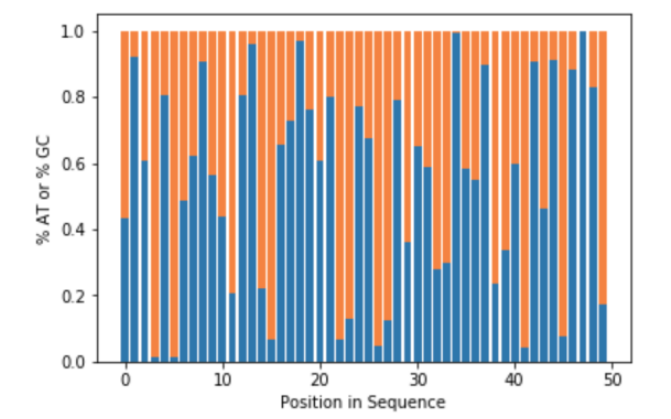


## 3.1
For each position in the MSA of each cluster, 
calculate the fraction of A or T, and the fraction of 
G or C (lower case in sequence file). Note that the sum of each quantity will sum 
to 1.0. Just like in previous labs, you will organize the data in a pandas DataFrame and use the DataFrame to make the bar plot.

As a first step in this process, complete the implementations of `cluster_alignment` and `build_cluster_dataframe`.
In this part of the assignment you will use Bio.Align's `MultipleSequenceAlignment` object that can be sliced by column.

See: https://biopython.org/DIST/docs/api/Bio.Align.MultipleSeqAlignment-class.html

In [47]:
from typing import List
from Bio import AlignIO
from Bio.Align import MultipleSeqAlignment

In [53]:
alignment = AlignIO.read("seqs.aligned.fa", "fasta")

In [61]:
def cluster_alignment(alignment: MultipleSeqAlignment, cluster: List[str]) -> MultipleSeqAlignment:
    """Creates a MultipleSequenceAlignment object for one cluster."""
    msa = MultipleSeqAlignment([])
    for record in alignment:
        # complete me
        if record.name in cluster:
            msa.append(record)
    return msa

cl1_alignment = cluster_alignment(alignment, cluster1)
cl2_alignment = cluster_alignment(alignment, cluster2)
cl3_alignment = cluster_alignment(alignment, cluster3)

In [90]:
alignment_column = str(cl1_alignment[:,8])
freq = {char : alignment_column.count(char) for char in (set(alignment_column + "gcat"))}
alignment_column

'ccctttctttttcct'

In [91]:
freq

{'a': 0, 't': 9, 'c': 6, 'g': 0}

In [92]:
(freq['g'] + freq['c']) / len(alignment_column)

0.4

In [129]:
import pandas as pd
import numpy as np

def build_cluster_dataframe(msa: MultipleSeqAlignment) -> pd.DataFrame:
    """
    Build the cluster-specific dataframe from the MSA.
    
    
    Returns
    -------
    A pandas DF with two columns ['%GC', '%AT'].
    Each row sums to 1.
    """
    
    gc_freq = [0] * msa.get_alignment_length()
    at_freq = [0] * msa.get_alignment_length()
    for i in range(0, msa.get_alignment_length()):
        alignment_column = str(msa[:,i]).replace('-', '')
        # complete loop
        freq = {char : alignment_column.count(char) for char in set(alignment_column + "gcat")}
        gc_freq[i] = freq['g'] + freq['c']
        at_freq[i] = freq['a'] + freq['t']
        
        
        
    gc_freq = np.array(gc_freq, dtype=float)
    at_freq = np.array(at_freq, dtype=float)
    df = pd.DataFrame()
    # complete rest
    df['GC'] = gc_freq
    df['AT'] = at_freq
    df = df.div(df.sum(axis=1), axis=0)
    return df

In [141]:
clus1_df = build_cluster_dataframe(cl1_alignment)

In [142]:
clus2_df = build_cluster_dataframe(cl2_alignment)

In [143]:
clus3_df = build_cluster_dataframe(cl3_alignment)

In [144]:
clus1_df

,GC,AT
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
2215,0.0,1.0
2216,1.0,0.0
2217,0.0,1.0
2218,0.0,1.0


In [145]:
clus2_df

,GC,AT
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
2215,0.0,1.0
2216,1.0,0.0
2217,0.0,1.0
2218,0.0,1.0


In [147]:
clus3_df

,GC,AT
0,0.000,1.000
1,0.000,1.000
2,1.000,0.000
3,1.000,0.000
4,0.875,0.125
...,...,...
2215,0.000,1.000
2216,1.000,0.000
2217,0.000,1.000
2218,0.000,1.000


## 3.2

Using the cluster specific dataframes you built, make the specified bar plots (three total plots total), using only the first 50 positions.

<AxesSubplot:title={'center':'Cluster 3'}>

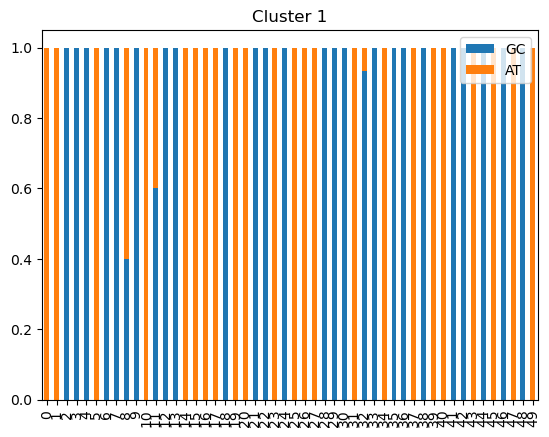

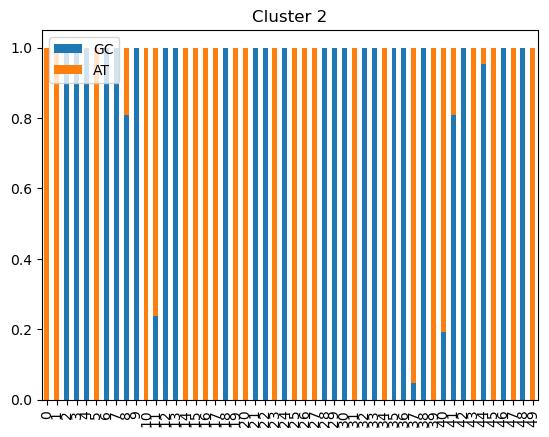

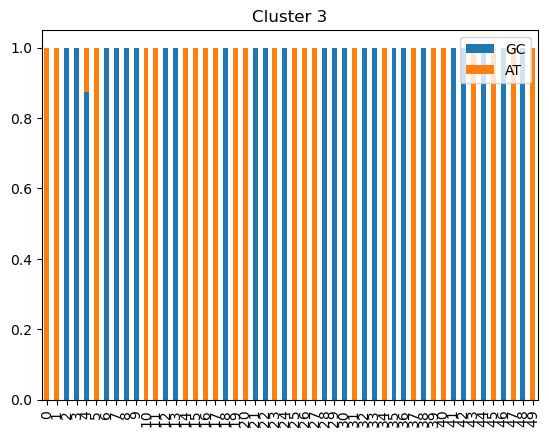

In [161]:
# code here
clus1_df.head(50).plot.bar(stacked=True, title='Cluster 1')
clus2_df.head(50).plot.bar(stacked=True, title='Cluster 2')
clus3_df.head(50).plot.bar(stacked=True, title='Cluster 3')

## 3.3

Next, find the length of each sequence in each 
cluster. Generate a box plot that shows the 
distribution of sequence lengths within each 
cluster. It will look something like this: 

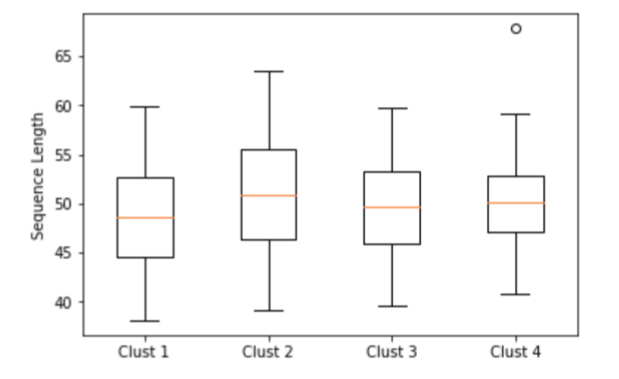

Consider using `SeqIO.to_dict` as part of your solution.

In [ ]:
# code here

In [169]:
clusters = [cl1_alignment, cl2_alignment, cl3_alignment]
lengths = [[], [], []]
for (cluster, length) in zip(clusters, lengths):
    for gene in cluster:
        length += [len(gene.seq.replace("-", ""))]

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff8747483a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff874748940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff8747480d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff874748ee0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff8747721f0>,
 'means': []}

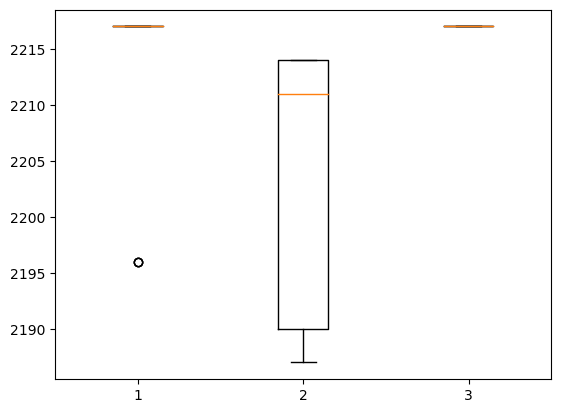

In [171]:
plt.boxplot(lengths)

# Submission checklist

1. Commit and push this notebook,
1. No need to add/commit/push any other files
1. Submit repo link on GitHub
